<a href="https://colab.research.google.com/github/ImAdit64/Aditya_Firsyananda_05TPLP006/blob/main/FuzzyTsukamotoNext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    SISTEM FUZZY TSUKAMOTO - HARGA JUAL MOTOR BEKAS

=== CONTOH PERHITUNGAN ===
=== PROSES INFERENSI FUZZY ===
Input: Tahun=2016, Harga Beli=Rp15,000,000, Kondisi=85%

Nilai Keanggotaan:
Tahun - Lama: 0.000, Agak Lama: 0.500, Baru: 0.500
Harga - Murah: 0.000, Normal: 0.442, Mahal: 0.558
Kondisi - Jelek: 0.474, Sedang: 0.526, Bagus: 0.000

Evaluasi Aturan:
R13: IF Tahun=agak_lama AND Harga=normal AND Kondisi=jelek THEN Harga Jual=agak_mahal
     α13 = min(0.500, 0.442, 0.474) = 0.442
     z13 = 10500000

R14: IF Tahun=agak_lama AND Harga=normal AND Kondisi=sedang THEN Harga Jual=agak_mahal
     α14 = min(0.500, 0.442, 0.526) = 0.442
     z14 = 10500000

R16: IF Tahun=agak_lama AND Harga=mahal AND Kondisi=jelek THEN Harga Jual=mahal
     α16 = min(0.500, 0.558, 0.474) = 0.474
     z16 = 15631579

R17: IF Tahun=agak_lama AND Harga=mahal AND Kondisi=sedang THEN Harga Jual=mahal
     α17 = min(0.500, 0.558, 0.526) = 0.500
     z17 = 15762500

R22: IF Tahun=baru AND Harga=normal AND Kondisi=

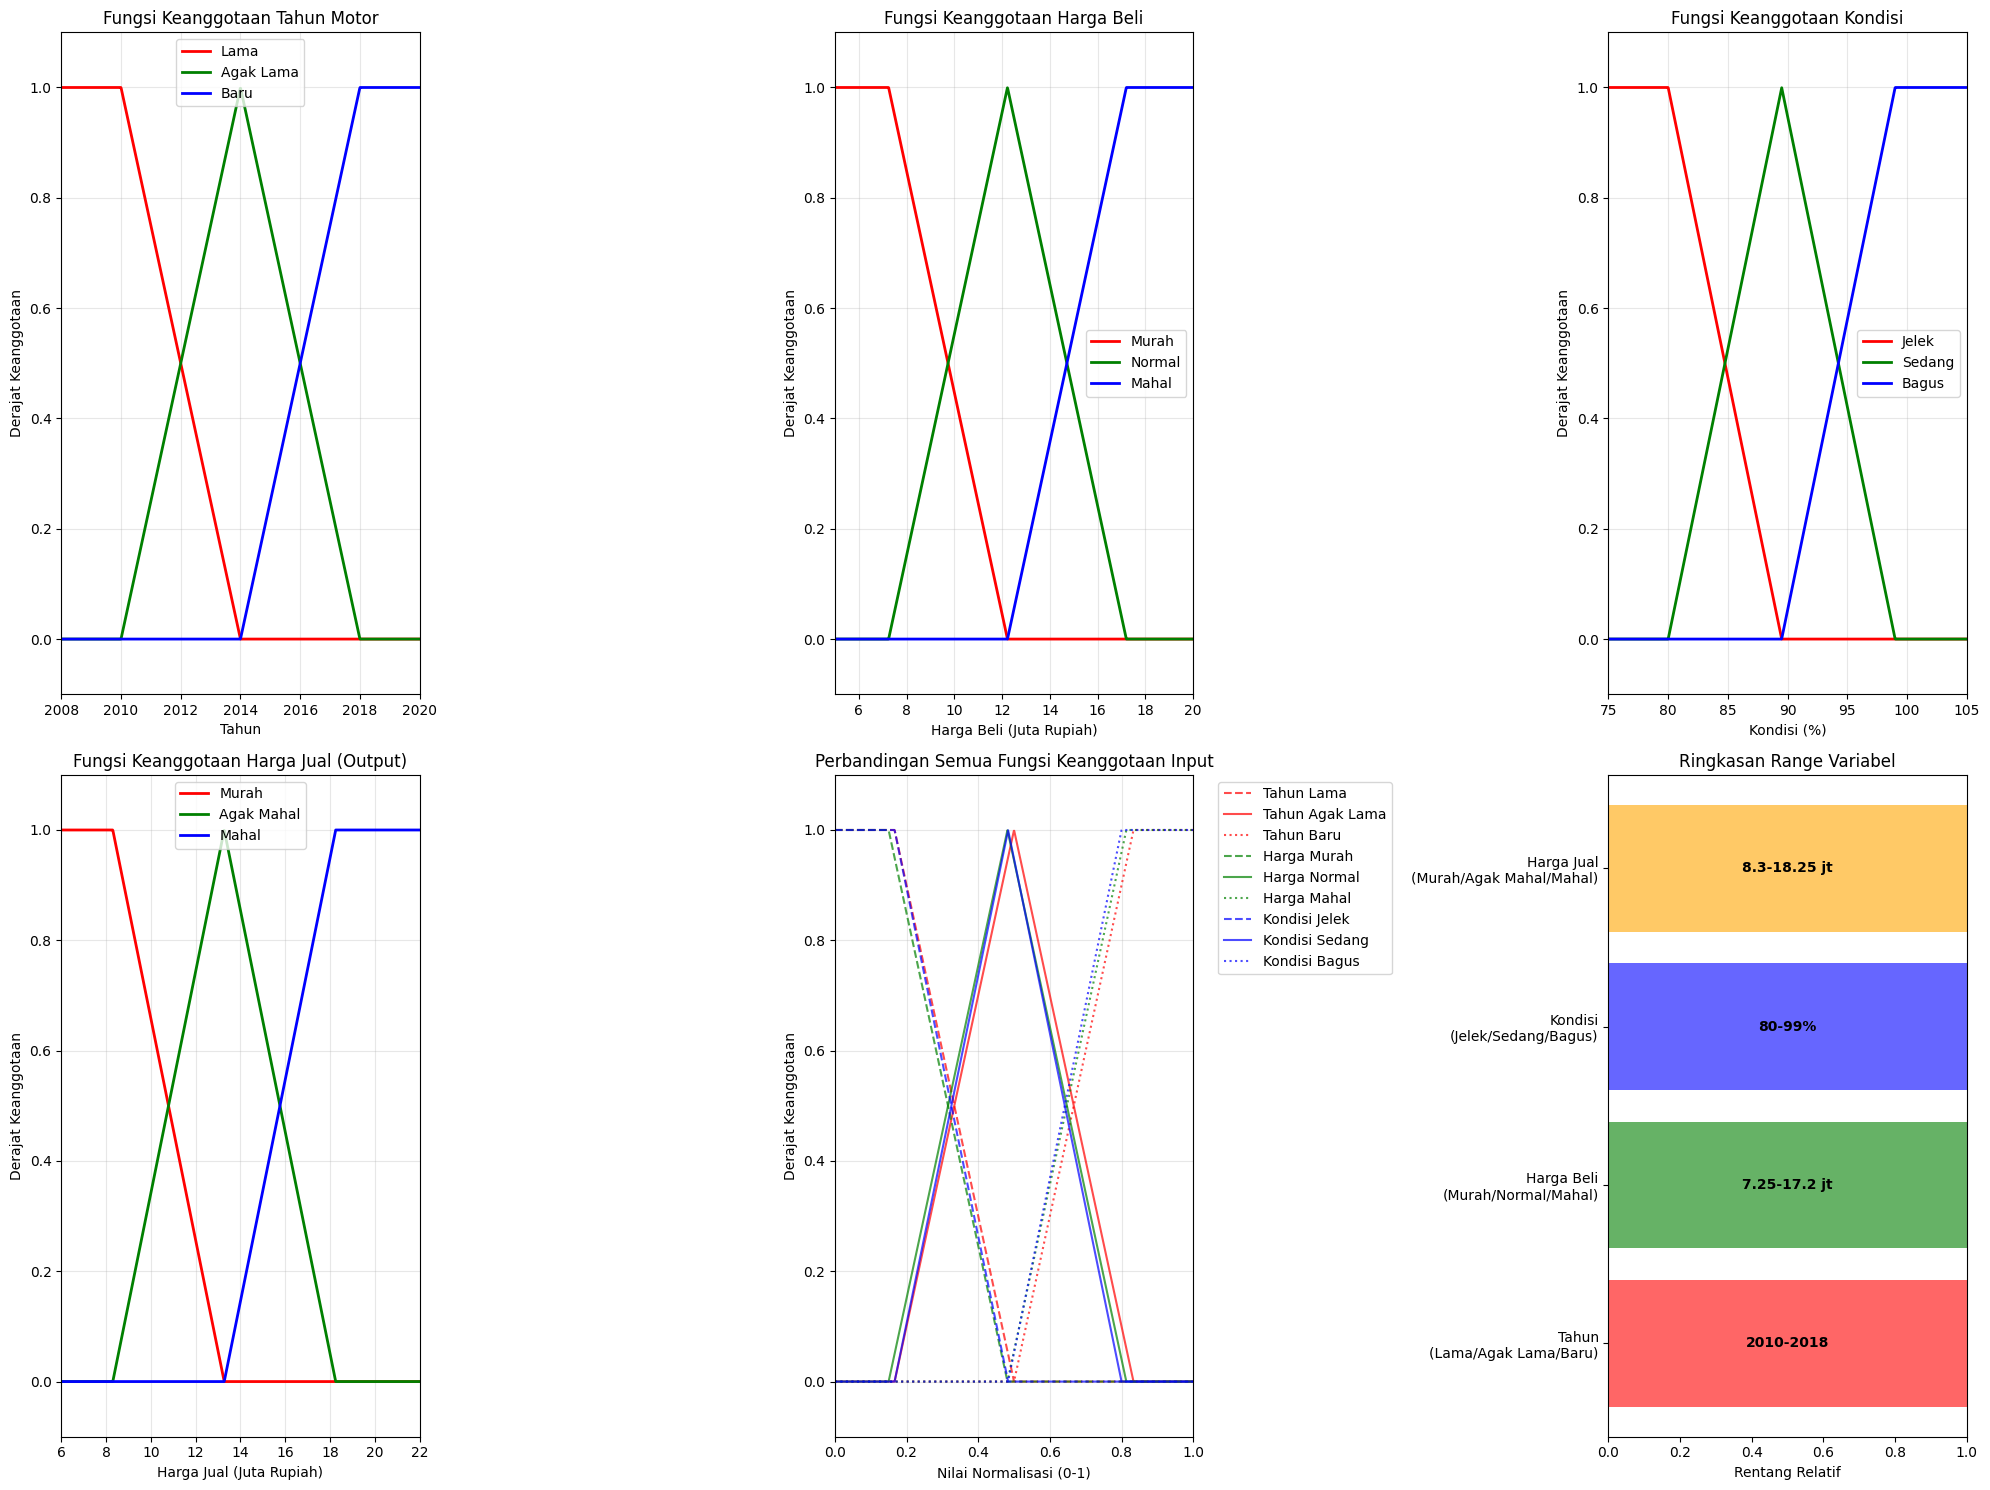

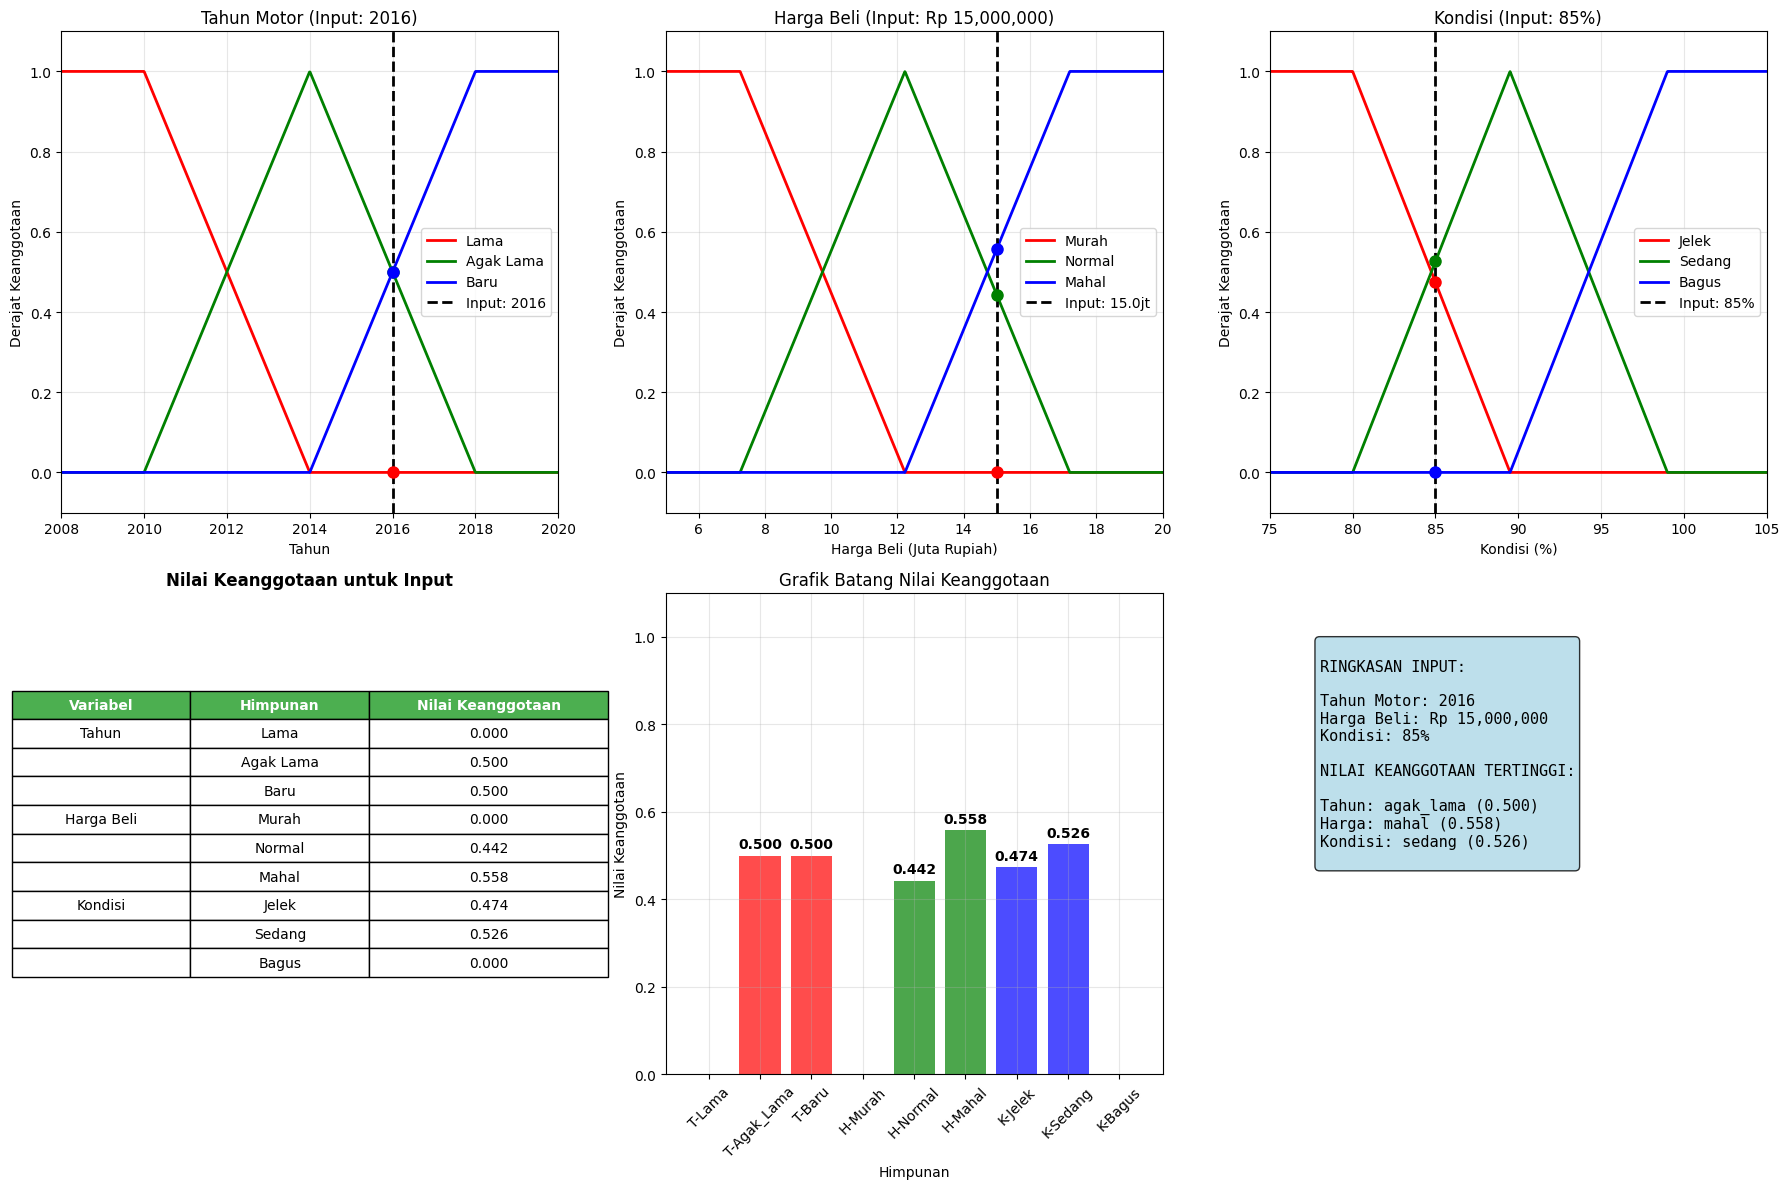

In [5]:
# Install libraries jika diperlukan (biasanya sudah tersedia di Colab)
import numpy as np
import matplotlib.pyplot as plt

class FuzzyMotorTsukamoto:
    def __init__(self):
        # Definisi fungsi keanggotaan untuk setiap variabel
        self.tahun_motor_ranges = {
            'lama': [2010, 2014],
            'agak_lama': [2010, 2018],
            'baru': [2014, 2018]
        }

        self.harga_beli_ranges = {
            'murah': [7250000, 12225000],
            'normal': [7250000, 17200000],
            'mahal': [12225000, 17200000]
        }

        self.kondisi_ranges = {
            'jelek': [80, 89.5],
            'sedang': [80, 99],
            'bagus': [89.5, 99]
        }

        self.harga_jual_ranges = {
            'murah': [8300000, 13275000],
            'agak_mahal': [8300000, 18250000],
            'mahal': [13275000, 18250000]
        }

        # Aturan fuzzy berdasarkan tabel
        self.rules = [
            {'tahun': 'lama', 'harga_beli': 'murah', 'kondisi': 'jelek', 'output': 'murah'},
            {'tahun': 'lama', 'harga_beli': 'murah', 'kondisi': 'sedang', 'output': 'murah'},
            {'tahun': 'lama', 'harga_beli': 'murah', 'kondisi': 'bagus', 'output': 'murah'},
            {'tahun': 'lama', 'harga_beli': 'normal', 'kondisi': 'jelek', 'output': 'agak_mahal'},
            {'tahun': 'lama', 'harga_beli': 'normal', 'kondisi': 'sedang', 'output': 'agak_mahal'},
            {'tahun': 'lama', 'harga_beli': 'normal', 'kondisi': 'bagus', 'output': 'agak_mahal'},
            {'tahun': 'lama', 'harga_beli': 'mahal', 'kondisi': 'jelek', 'output': 'agak_mahal'},
            {'tahun': 'lama', 'harga_beli': 'mahal', 'kondisi': 'sedang', 'output': 'agak_mahal'},
            {'tahun': 'lama', 'harga_beli': 'mahal', 'kondisi': 'bagus', 'output': 'mahal'},
            {'tahun': 'agak_lama', 'harga_beli': 'murah', 'kondisi': 'jelek', 'output': 'murah'},
            {'tahun': 'agak_lama', 'harga_beli': 'murah', 'kondisi': 'sedang', 'output': 'murah'},
            {'tahun': 'agak_lama', 'harga_beli': 'murah', 'kondisi': 'bagus', 'output': 'murah'},
            {'tahun': 'agak_lama', 'harga_beli': 'normal', 'kondisi': 'jelek', 'output': 'agak_mahal'},
            {'tahun': 'agak_lama', 'harga_beli': 'normal', 'kondisi': 'sedang', 'output': 'agak_mahal'},
            {'tahun': 'agak_lama', 'harga_beli': 'normal', 'kondisi': 'bagus', 'output': 'agak_mahal'},
            {'tahun': 'agak_lama', 'harga_beli': 'mahal', 'kondisi': 'jelek', 'output': 'mahal'},
            {'tahun': 'agak_lama', 'harga_beli': 'mahal', 'kondisi': 'sedang', 'output': 'mahal'},
            {'tahun': 'agak_lama', 'harga_beli': 'mahal', 'kondisi': 'bagus', 'output': 'mahal'},
            {'tahun': 'baru', 'harga_beli': 'murah', 'kondisi': 'jelek', 'output': 'agak_mahal'},
            {'tahun': 'baru', 'harga_beli': 'murah', 'kondisi': 'sedang', 'output': 'murah'},
            {'tahun': 'baru', 'harga_beli': 'murah', 'kondisi': 'bagus', 'output': 'mahal'},
            {'tahun': 'baru', 'harga_beli': 'normal', 'kondisi': 'jelek', 'output': 'agak_mahal'},
            {'tahun': 'baru', 'harga_beli': 'normal', 'kondisi': 'sedang', 'output': 'agak_mahal'},
            {'tahun': 'baru', 'harga_beli': 'normal', 'kondisi': 'bagus', 'output': 'mahal'},
            {'tahun': 'baru', 'harga_beli': 'mahal', 'kondisi': 'jelek', 'output': 'mahal'},
            {'tahun': 'baru', 'harga_beli': 'mahal', 'kondisi': 'sedang', 'output': 'mahal'},
            {'tahun': 'baru', 'harga_beli': 'mahal', 'kondisi': 'bagus', 'output': 'mahal'}
        ]

    def membership_tahun_lama(self, tahun):
        if tahun <= 2010:
            return 1
        elif 2010 < tahun < 2014:
            return (2014 - tahun) / (2014 - 2010)
        else:
            return 0

    def membership_tahun_agak_lama(self, tahun):
        if 2010 <= tahun <= 2014:
            return (tahun - 2010) / (2014 - 2010)
        elif 2014 < tahun < 2018:
            return (2018 - tahun) / (2018 - 2014)
        else:
            return 0

    def membership_tahun_baru(self, tahun):
        if tahun < 2014:
            return 0
        elif 2014 <= tahun < 2018:
            return (tahun - 2014) / (2018 - 2014)
        else:
            return 1

    def membership_harga_murah(self, harga):
        if harga <= 7250000:
            return 1
        elif 7250000 < harga < 12225000:
            return (12225000 - harga) / (12225000 - 7250000)
        else:
            return 0

    def membership_harga_normal(self, harga):
        if 7250000 <= harga <= 12225000:
            return (harga - 7250000) / (12225000 - 7250000)
        elif 12225000 < harga < 17200000:
            return (17200000 - harga) / (17200000 - 12225000)
        else:
            return 0

    def membership_harga_mahal(self, harga):
        if harga < 12225000:
            return 0
        elif 12225000 <= harga < 17200000:
            return (harga - 12225000) / (17200000 - 12225000)
        else:
            return 1

    def membership_kondisi_jelek(self, kondisi):
        if kondisi <= 80:
            return 1
        elif 80 < kondisi < 89.5:
            return (89.5 - kondisi) / (89.5 - 80)
        else:
            return 0

    def membership_kondisi_sedang(self, kondisi):
        if 80 <= kondisi <= 89.5:
            return (kondisi - 80) / (89.5 - 80)
        elif 89.5 < kondisi < 99:
            return (99 - kondisi) / (99 - 89.5)
        else:
            return 0

    def membership_kondisi_bagus(self, kondisi):
        if kondisi < 89.5:
            return 0
        elif 89.5 <= kondisi < 99:
            return (kondisi - 89.5) / (99 - 89.5)
        else:
            return 1

    def get_membership_values(self, tahun, harga_beli, kondisi):
        # Hitung nilai keanggotaan untuk setiap variabel input
        tahun_values = {
            'lama': self.membership_tahun_lama(tahun),
            'agak_lama': self.membership_tahun_agak_lama(tahun),
            'baru': self.membership_tahun_baru(tahun)
        }

        harga_values = {
            'murah': self.membership_harga_murah(harga_beli),
            'normal': self.membership_harga_normal(harga_beli),
            'mahal': self.membership_harga_mahal(harga_beli)
        }

        kondisi_values = {
            'jelek': self.membership_kondisi_jelek(kondisi),
            'sedang': self.membership_kondisi_sedang(kondisi),
            'bagus': self.membership_kondisi_bagus(kondisi)
        }

        return tahun_values, harga_values, kondisi_values

    def calculate_z_value(self, alpha, output_type):
        # Hitung nilai z berdasarkan alpha dan tipe output (metode Tsukamoto)
        if output_type == 'murah':
            # z = 13275000 - alpha * (13275000 - 8300000)
            z = 13275000 - alpha * 4975000
        elif output_type == 'agak_mahal':
            if alpha <= 0.5:
                # Sisi kiri trapezoid
                z = 8300000 + alpha * (13275000 - 8300000)
            else:
                # Sisi kanan trapezoid
                z = 18250000 - alpha * (18250000 - 13275000)
        else:  # mahal
            z = 13275000 + alpha * 4975000

        return z

    def plot_membership_functions(self):
        """
        Fungsi untuk menampilkan plot grafik fungsi keanggotaan semua variabel
        """
        plt.figure(figsize=(20, 15))

        # 1. Plot fungsi keanggotaan Tahun Motor
        plt.subplot(2, 3, 1)
        tahun_range = np.linspace(2008, 2020, 1000)
        lama_values = [self.membership_tahun_lama(t) for t in tahun_range]
        agak_lama_values = [self.membership_tahun_agak_lama(t) for t in tahun_range]
        baru_values = [self.membership_tahun_baru(t) for t in tahun_range]

        plt.plot(tahun_range, lama_values, 'r-', label='Lama', linewidth=2)
        plt.plot(tahun_range, agak_lama_values, 'g-', label='Agak Lama', linewidth=2)
        plt.plot(tahun_range, baru_values, 'b-', label='Baru', linewidth=2)
        plt.xlabel('Tahun')
        plt.ylabel('Derajat Keanggotaan')
        plt.title('Fungsi Keanggotaan Tahun Motor')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xlim(2008, 2020)
        plt.ylim(-0.1, 1.1)

        # 2. Plot fungsi keanggotaan Harga Beli
        plt.subplot(2, 3, 2)
        harga_range = np.linspace(5000000, 20000000, 1000)
        murah_values = [self.membership_harga_murah(h) for h in harga_range]
        normal_values = [self.membership_harga_normal(h) for h in harga_range]
        mahal_values = [self.membership_harga_mahal(h) for h in harga_range]

        plt.plot(harga_range/1000000, murah_values, 'r-', label='Murah', linewidth=2)
        plt.plot(harga_range/1000000, normal_values, 'g-', label='Normal', linewidth=2)
        plt.plot(harga_range/1000000, mahal_values, 'b-', label='Mahal', linewidth=2)
        plt.xlabel('Harga Beli (Juta Rupiah)')
        plt.ylabel('Derajat Keanggotaan')
        plt.title('Fungsi Keanggotaan Harga Beli')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xlim(5, 20)
        plt.ylim(-0.1, 1.1)

        # 3. Plot fungsi keanggotaan Kondisi
        plt.subplot(2, 3, 3)
        kondisi_range = np.linspace(75, 105, 1000)
        jelek_values = [self.membership_kondisi_jelek(k) for k in kondisi_range]
        sedang_values = [self.membership_kondisi_sedang(k) for k in kondisi_range]
        bagus_values = [self.membership_kondisi_bagus(k) for k in kondisi_range]

        plt.plot(kondisi_range, jelek_values, 'r-', label='Jelek', linewidth=2)
        plt.plot(kondisi_range, sedang_values, 'g-', label='Sedang', linewidth=2)
        plt.plot(kondisi_range, bagus_values, 'b-', label='Bagus', linewidth=2)
        plt.xlabel('Kondisi (%)')
        plt.ylabel('Derajat Keanggotaan')
        plt.title('Fungsi Keanggotaan Kondisi')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xlim(75, 105)
        plt.ylim(-0.1, 1.1)

        # 4. Plot fungsi keanggotaan Harga Jual (Output)
        plt.subplot(2, 3, 4)
        harga_jual_range = np.linspace(6000000, 22000000, 1000)

        # Fungsi keanggotaan untuk output
        def membership_output_murah(harga):
            if harga <= 8300000:
                return 1
            elif 8300000 < harga < 13275000:
                return (13275000 - harga) / (13275000 - 8300000)
            else:
                return 0

        def membership_output_agak_mahal(harga):
            if 8300000 <= harga <= 13275000:
                return (harga - 8300000) / (13275000 - 8300000)
            elif 13275000 < harga < 18250000:
                return (18250000 - harga) / (18250000 - 13275000)
            else:
                return 0

        def membership_output_mahal(harga):
            if harga < 13275000:
                return 0
            elif 13275000 <= harga < 18250000:
                return (harga - 13275000) / (18250000 - 13275000)
            else:
                return 1

        output_murah_values = [membership_output_murah(h) for h in harga_jual_range]
        output_agak_mahal_values = [membership_output_agak_mahal(h) for h in harga_jual_range]
        output_mahal_values = [membership_output_mahal(h) for h in harga_jual_range]

        plt.plot(harga_jual_range/1000000, output_murah_values, 'r-', label='Murah', linewidth=2)
        plt.plot(harga_jual_range/1000000, output_agak_mahal_values, 'g-', label='Agak Mahal', linewidth=2)
        plt.plot(harga_jual_range/1000000, output_mahal_values, 'b-', label='Mahal', linewidth=2)
        plt.xlabel('Harga Jual (Juta Rupiah)')
        plt.ylabel('Derajat Keanggotaan')
        plt.title('Fungsi Keanggotaan Harga Jual (Output)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xlim(6, 22)
        plt.ylim(-0.1, 1.1)

        # 5. Plot gabungan semua input
        plt.subplot(2, 3, 5)
        # Normalisasi untuk perbandingan visual
        tahun_norm = [(t-2008)/(2020-2008) for t in tahun_range]
        harga_norm = [(h-5000000)/(20000000-5000000) for h in harga_range]
        kondisi_norm = [(k-75)/(105-75) for k in kondisi_range]

        plt.plot(tahun_norm, lama_values, 'r--', label='Tahun Lama', alpha=0.7)
        plt.plot(tahun_norm, agak_lama_values, 'r-', label='Tahun Agak Lama', alpha=0.7)
        plt.plot(tahun_norm, baru_values, 'r:', label='Tahun Baru', alpha=0.7)

        plt.plot(harga_norm, murah_values, 'g--', label='Harga Murah', alpha=0.7)
        plt.plot(harga_norm, normal_values, 'g-', label='Harga Normal', alpha=0.7)
        plt.plot(harga_norm, mahal_values, 'g:', label='Harga Mahal', alpha=0.7)

        plt.plot(kondisi_norm, jelek_values, 'b--', label='Kondisi Jelek', alpha=0.7)
        plt.plot(kondisi_norm, sedang_values, 'b-', label='Kondisi Sedang', alpha=0.7)
        plt.plot(kondisi_norm, bagus_values, 'b:', label='Kondisi Bagus', alpha=0.7)

        plt.xlabel('Nilai Normalisasi (0-1)')
        plt.ylabel('Derajat Keanggotaan')
        plt.title('Perbandingan Semua Fungsi Keanggotaan Input')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.xlim(0, 1)
        plt.ylim(-0.1, 1.1)

        # 6. Plot ringkasan distribusi
        plt.subplot(2, 3, 6)
        categories = ['Tahun\n(Lama/Agak Lama/Baru)', 'Harga Beli\n(Murah/Normal/Mahal)',
                     'Kondisi\n(Jelek/Sedang/Bagus)', 'Harga Jual\n(Murah/Agak Mahal/Mahal)']
        ranges = [
            f"{2010}-{2018}",
            f"{7.25}-{17.2} jt",
            f"{80}-{99}%",
            f"{8.3}-{18.25} jt"
        ]

        plt.barh(categories, [1, 1, 1, 1], color=['red', 'green', 'blue', 'orange'], alpha=0.6)
        for i, (cat, rng) in enumerate(zip(categories, ranges)):
            plt.text(0.5, i, rng, ha='center', va='center', fontweight='bold')

        plt.xlim(0, 1)
        plt.title('Ringkasan Range Variabel')
        plt.xlabel('Rentang Relatif')

        plt.tight_layout()
        plt.show()

    def plot_specific_case(self, tahun, harga_beli, kondisi):
        """
        Fungsi untuk menampilkan plot dengan titik input spesifik
        """
        plt.figure(figsize=(18, 12))

        # Plot dengan titik input yang disorot

        # 1. Tahun Motor
        plt.subplot(2, 3, 1)
        tahun_range = np.linspace(2008, 2020, 1000)
        lama_values = [self.membership_tahun_lama(t) for t in tahun_range]
        agak_lama_values = [self.membership_tahun_agak_lama(t) for t in tahun_range]
        baru_values = [self.membership_tahun_baru(t) for t in tahun_range]

        plt.plot(tahun_range, lama_values, 'r-', label='Lama', linewidth=2)
        plt.plot(tahun_range, agak_lama_values, 'g-', label='Agak Lama', linewidth=2)
        plt.plot(tahun_range, baru_values, 'b-', label='Baru', linewidth=2)

        # Titik input
        plt.axvline(x=tahun, color='black', linestyle='--', linewidth=2, label=f'Input: {tahun}')
        plt.plot(tahun, self.membership_tahun_lama(tahun), 'ro', markersize=8)
        plt.plot(tahun, self.membership_tahun_agak_lama(tahun), 'go', markersize=8)
        plt.plot(tahun, self.membership_tahun_baru(tahun), 'bo', markersize=8)

        plt.xlabel('Tahun')
        plt.ylabel('Derajat Keanggotaan')
        plt.title(f'Tahun Motor (Input: {tahun})')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xlim(2008, 2020)
        plt.ylim(-0.1, 1.1)

        # 2. Harga Beli
        plt.subplot(2, 3, 2)
        harga_range = np.linspace(5000000, 20000000, 1000)
        murah_values = [self.membership_harga_murah(h) for h in harga_range]
        normal_values = [self.membership_harga_normal(h) for h in harga_range]
        mahal_values = [self.membership_harga_mahal(h) for h in harga_range]

        plt.plot(harga_range/1000000, murah_values, 'r-', label='Murah', linewidth=2)
        plt.plot(harga_range/1000000, normal_values, 'g-', label='Normal', linewidth=2)
        plt.plot(harga_range/1000000, mahal_values, 'b-', label='Mahal', linewidth=2)

        # Titik input
        plt.axvline(x=harga_beli/1000000, color='black', linestyle='--', linewidth=2,
                   label=f'Input: {harga_beli/1000000:.1f}jt')
        plt.plot(harga_beli/1000000, self.membership_harga_murah(harga_beli), 'ro', markersize=8)
        plt.plot(harga_beli/1000000, self.membership_harga_normal(harga_beli), 'go', markersize=8)
        plt.plot(harga_beli/1000000, self.membership_harga_mahal(harga_beli), 'bo', markersize=8)

        plt.xlabel('Harga Beli (Juta Rupiah)')
        plt.ylabel('Derajat Keanggotaan')
        plt.title(f'Harga Beli (Input: Rp {harga_beli:,})')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xlim(5, 20)
        plt.ylim(-0.1, 1.1)

        # 3. Kondisi
        plt.subplot(2, 3, 3)
        kondisi_range = np.linspace(75, 105, 1000)
        jelek_values = [self.membership_kondisi_jelek(k) for k in kondisi_range]
        sedang_values = [self.membership_kondisi_sedang(k) for k in kondisi_range]
        bagus_values = [self.membership_kondisi_bagus(k) for k in kondisi_range]

        plt.plot(kondisi_range, jelek_values, 'r-', label='Jelek', linewidth=2)
        plt.plot(kondisi_range, sedang_values, 'g-', label='Sedang', linewidth=2)
        plt.plot(kondisi_range, bagus_values, 'b-', label='Bagus', linewidth=2)

        # Titik input
        plt.axvline(x=kondisi, color='black', linestyle='--', linewidth=2, label=f'Input: {kondisi}%')
        plt.plot(kondisi, self.membership_kondisi_jelek(kondisi), 'ro', markersize=8)
        plt.plot(kondisi, self.membership_kondisi_sedang(kondisi), 'go', markersize=8)
        plt.plot(kondisi, self.membership_kondisi_bagus(kondisi), 'bo', markersize=8)

        plt.xlabel('Kondisi (%)')
        plt.ylabel('Derajat Keanggotaan')
        plt.title(f'Kondisi (Input: {kondisi}%)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xlim(75, 105)
        plt.ylim(-0.1, 1.1)

        # 4. Tabel nilai keanggotaan
        plt.subplot(2, 3, 4)
        plt.axis('off')

        tahun_vals, harga_vals, kondisi_vals = self.get_membership_values(tahun, harga_beli, kondisi)

        table_data = [
            ['Variabel', 'Himpunan', 'Nilai Keanggotaan'],
            ['Tahun', 'Lama', f'{tahun_vals["lama"]:.3f}'],
            ['', 'Agak Lama', f'{tahun_vals["agak_lama"]:.3f}'],
            ['', 'Baru', f'{tahun_vals["baru"]:.3f}'],
            ['Harga Beli', 'Murah', f'{harga_vals["murah"]:.3f}'],
            ['', 'Normal', f'{harga_vals["normal"]:.3f}'],
            ['', 'Mahal', f'{harga_vals["mahal"]:.3f}'],
            ['Kondisi', 'Jelek', f'{kondisi_vals["jelek"]:.3f}'],
            ['', 'Sedang', f'{kondisi_vals["sedang"]:.3f}'],
            ['', 'Bagus', f'{kondisi_vals["bagus"]:.3f}']
        ]

        table = plt.table(cellText=table_data, cellLoc='center', loc='center',
                         colWidths=[0.3, 0.3, 0.4])
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.5)

        # Warna header
        for i in range(3):
            table[(0, i)].set_facecolor('#4CAF50')
            table[(0, i)].set_text_props(weight='bold', color='white')

        plt.title('Nilai Keanggotaan untuk Input', fontsize=12, fontweight='bold')

        # 5. Bar chart nilai keanggotaan
        plt.subplot(2, 3, 5)
        categories = ['T-Lama', 'T-Agak_Lama', 'T-Baru', 'H-Murah', 'H-Normal', 'H-Mahal',
                     'K-Jelek', 'K-Sedang', 'K-Bagus']
        values = [tahun_vals["lama"], tahun_vals["agak_lama"], tahun_vals["baru"],
                 harga_vals["murah"], harga_vals["normal"], harga_vals["mahal"],
                 kondisi_vals["jelek"], kondisi_vals["sedang"], kondisi_vals["bagus"]]
        colors = ['red', 'red', 'red', 'green', 'green', 'green', 'blue', 'blue', 'blue']

        bars = plt.bar(categories, values, color=colors, alpha=0.7)
        plt.xlabel('Himpunan')
        plt.ylabel('Nilai Keanggotaan')
        plt.title('Grafik Batang Nilai Keanggotaan')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.ylim(0, 1.1)

        # Tambah nilai di atas bar
        for bar, value in zip(bars, values):
            if value > 0:
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                        f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

        # 6. Summary input
        plt.subplot(2, 3, 6)
        plt.axis('off')

        # Buat ringkasan input
        summary_text = f"""
RINGKASAN INPUT:

Tahun Motor: {tahun}
Harga Beli: Rp {harga_beli:,}
Kondisi: {kondisi}%

NILAI KEANGGOTAAN TERTINGGI:

Tahun: {max(tahun_vals, key=tahun_vals.get)} ({max(tahun_vals.values()):.3f})
Harga: {max(harga_vals, key=harga_vals.get)} ({max(harga_vals.values()):.3f})
Kondisi: {max(kondisi_vals, key=kondisi_vals.get)} ({max(kondisi_vals.values()):.3f})
        """

        plt.text(0.1, 0.9, summary_text, transform=plt.gca().transAxes,
                fontsize=11, verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))

        plt.tight_layout()
        plt.show()

    def inference(self, tahun, harga_beli, kondisi):
        tahun_values, harga_values, kondisi_values = self.get_membership_values(tahun, harga_beli, kondisi)

        rule_results = []

        print("=== PROSES INFERENSI FUZZY ===")
        print(f"Input: Tahun={tahun}, Harga Beli=Rp{harga_beli:,}, Kondisi={kondisi}%")
        print()

        print("Nilai Keanggotaan:")
        print(f"Tahun - Lama: {tahun_values['lama']:.3f}, Agak Lama: {tahun_values['agak_lama']:.3f}, Baru: {tahun_values['baru']:.3f}")
        print(f"Harga - Murah: {harga_values['murah']:.3f}, Normal: {harga_values['normal']:.3f}, Mahal: {harga_values['mahal']:.3f}")
        print(f"Kondisi - Jelek: {kondisi_values['jelek']:.3f}, Sedang: {kondisi_values['sedang']:.3f}, Bagus: {kondisi_values['bagus']:.3f}")
        print()

        print("Evaluasi Aturan:")
        for i, rule in enumerate(self.rules, 1):
            # Hitung alpha (minimum dari nilai keanggotaan input)
            alpha = min(
                tahun_values[rule['tahun']],
                harga_values[rule['harga_beli']],
                kondisi_values[rule['kondisi']]
            )

            if alpha > 0:  # Hanya proses aturan yang aktif
                z = self.calculate_z_value(alpha, rule['output'])
                rule_results.append((alpha, z))
                print(f"R{i}: IF Tahun={rule['tahun']} AND Harga={rule['harga_beli']} AND Kondisi={rule['kondisi']} THEN Harga Jual={rule['output']}")
                print(f"     α{i} = min({tahun_values[rule['tahun']]:.3f}, {harga_values[rule['harga_beli']]:.3f}, {kondisi_values[rule['kondisi']]:.3f}) = {alpha:.3f}")
                print(f"     z{i} = {z:.0f}")
                print()

        # Defuzzifikasi menggunakan metode weighted average (Tsukamoto)
        if rule_results:
            numerator = sum(alpha * z for alpha, z in rule_results)
            denominator = sum(alpha for alpha, z in rule_results)

            if denominator != 0:
                final_result = numerator / denominator
            else:
                final_result = 0

            print("=== DEFUZZIFIKASI ===")
            print(f"Hasil = Σ(αi × zi) / Σ(αi)")
            print(f"Hasil = {numerator:.0f} / {denominator:.3f}")
            print(f"Hasil = Rp{final_result:.0f}")

            return final_result
        else:
            print("Tidak ada aturan yang aktif!")
            return 0

# Fungsi untuk menghitung satu kasus
def hitung_harga_jual(tahun, harga_beli, kondisi):
    fuzzy_system = FuzzyMotorTsukamoto()
    return fuzzy_system.inference(tahun, harga_beli, kondisi)

# Fungsi untuk menampilkan plot
def tampilkan_plot_fuzzy():
    """Fungsi untuk menampilkan semua plot fungsi keanggotaan"""
    fuzzy_system = FuzzyMotorTsukamoto()
    fuzzy_system.plot_membership_functions()

def tampilkan_plot_dengan_input(tahun, harga_beli, kondisi):
    """Fungsi untuk menampilkan plot dengan input spesifik"""
    fuzzy_system = FuzzyMotorTsukamoto()
    fuzzy_system.plot_specific_case(tahun, harga_beli, kondisi)

# Contoh penggunaan
print("=" * 60)
print("    SISTEM FUZZY TSUKAMOTO - HARGA JUAL MOTOR BEKAS")
print("=" * 60)

# Contoh perhitungan
print("\n=== CONTOH PERHITUNGAN ===")
tahun_contoh = 2016
harga_beli_contoh = 15000000
kondisi_contoh = 85

hasil = hitung_harga_jual(tahun_contoh, harga_beli_contoh, kondisi_contoh)
print(f"\nHASIL AKHIR: Rp {hasil:,.0f}")

print("\n" + "="*60)
print("CARA MENGGUNAKAN FUNGSI PLOTTING:")
print("="*60)
print("1. Untuk menampilkan semua plot fungsi keanggotaan:")
print("   tampilkan_plot_fuzzy()")
print()
print("2. Untuk menampilkan plot dengan input spesifik:")
print("   tampilkan_plot_dengan_input(tahun, harga_beli, kondisi)")
print()
print("Contoh:")
print(f"   tampilkan_plot_dengan_input({tahun_contoh}, {harga_beli_contoh}, {kondisi_contoh})")
print("="*60)

# Uncomment baris di bawah untuk menampilkan plot
tampilkan_plot_fuzzy()
tampilkan_plot_dengan_input(tahun_contoh, harga_beli_contoh, kondisi_contoh)